In [1]:
!pip install --upgrade pyTsetlinMachine

Requirement already up-to-date: pyTsetlinMachine in /usr/local/lib/python3.6/dist-packages (0.4.4)


In [0]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


import pyTsetlinMachine
from pyTsetlinMachine.tm import MultiClassTsetlinMachine
from pyTsetlinMachine.tm import RegressionTsetlinMachine
from pyTsetlinMachine.tools import Binarizer


In [4]:
from google.colab import  files
file = files.upload()

Saving alber.csv to alber (1).csv


In [0]:
filename = "alber.csv"
df = pd.read_csv(filename, header=0, usecols=["IN","OUT","INQ","FILE","ADJ","FP","EFFORT"])

In [0]:
data_columns = ["IN","OUT","INQ","FILE","ADJ","FP"]
target_columns = ["EFFORT"]
x = df[data_columns]
T = df[target_columns]

In [0]:
scaler = MinMaxScaler()
scaled_data_x = scaler.fit_transform(x)

scaler = MinMaxScaler()
scaled_data_y = scaler.fit_transform(T)
scaled_data_y =  scaled_data_y.reshape(24)

In [0]:
X = np.array(scaled_data_x)
T = np.array(scaled_data_y)


In [149]:
print(X.shape)
print(T.shape)

(24, 6)
(24,)


0.09171800382043933
0.05548829990448902
0.040276902260426635
0.05113825214899715
0.040034383954154755


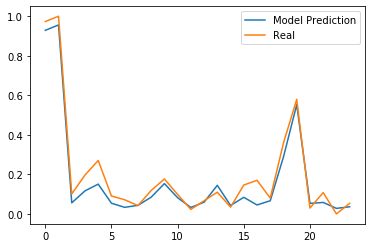

0.040034383954154755


In [150]:
b = Binarizer(max_bits_per_feature = 10)
b.fit(X)
X_transformed = b.transform(X)

tm = RegressionTsetlinMachine(3000, 1500, 3.2)

tm_results = np.empty(0)
for i in range(5):
  X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, T)
  tm.fit(X_train, Y_train, epochs=200)
  tm_results = np.append(tm_results, np.sqrt(((tm.predict(X_test) - Y_test)**2).mean()))
  ep_prediction = tm.predict(X_transformed)
  print(mean_absolute_error(T,ep_prediction))
prediction = tm.predict(X_transformed)
plt.plot(prediction, label="Model Prediction")
plt.plot(T, label="Real")
plt.legend()
plt.show()
print(mean_absolute_error(T,prediction))